<a href="https://colab.research.google.com/github/EstefanyVelazco2001/TESIS/blob/main/Datos_limpios_COLOQUIO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PREPROCESAMIENTO

In [14]:
#Paquete para manipular datos
import pandas as pd
#Leemos el conjunto de datos en Drive
datos=pd.read_excel('/CENTIMETROS.xlsx')
datos.head()

,DQO,RED,GREEN,BLUE,Concentracion
0,731.666667,10.507042,16.309859,18.760563,1
1,427.666667,13.041667,20.555556,23.319444,1
2,514.000000,10.767123,16.712329,18.958904,1
3,836.000000,12.055556,19.000000,22.666667,1
4,720.333333,10.283784,15.000000,16.959459,1


In [15]:
datos.head()

,DQO,RED,GREEN,BLUE,Concentracion
0,731.666667,10.507042,16.309859,18.760563,1
1,427.666667,13.041667,20.555556,23.319444,1
2,514.000000,10.767123,16.712329,18.958904,1
3,836.000000,12.055556,19.000000,22.666667,1
4,720.333333,10.283784,15.000000,16.959459,1


In [16]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   DQO            94 non-null     float64
 1   RED            94 non-null     float64
 2   GREEN          94 non-null     float64
 3   BLUE           94 non-null     float64
 4   Concentracion  94 non-null     int64  
dtypes: float64(4), int64(1)
memory usage: 3.8 KB


In [17]:
#Obtenemos los estadisticos
datos.describe().T

,count,mean,std,min,25%,50%,75%,max
DQO,94.0,733.434397,259.429307,278.000000,539.666667,719.000000,864.833333,1338.333333
RED,94.0,11.376302,0.967555,9.493151,10.720814,11.402663,11.913851,14.531646
GREEN,94.0,17.203528,1.471436,13.890411,16.129762,17.293818,18.059477,21.025316
BLUE,94.0,19.370708,1.943153,16.028169,17.859351,19.295731,20.722907,24.268657
Concentracion,94.0,1.372340,0.486021,1.000000,1.000000,1.000000,2.000000,2.000000


[texto del vínculo](https://)# Mapa de CALOR

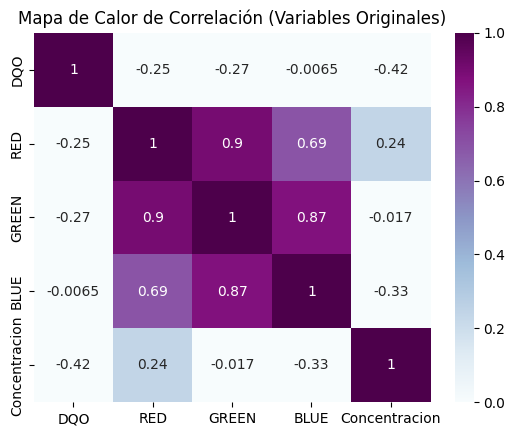

In [18]:
#Mapa de calor para visualizar la correlación de los parametros
import matplotlib.pyplot as plt
import seaborn as sns
sns.heatmap(datos.corr(method="pearson"),vmin=0, vmax=1, annot=True, cmap="BuPu")
plt.title('Mapa de Calor de Correlación (Variables Originales)')
plt.show()

# Preprocesamiento de los datos

In [19]:
#Agregamos una columna nueva para nuestro conjunto de datos para definir los datos de DQO
DQO_categoria=[]
for i in datos ["DQO"]:
  if i<210:
    DQO_categoria.append("Aceptable")
  elif i==500:
    DQO_categoria.append("Limite permitido")
  elif i>500 and i<=1200:
    DQO_categoria.append("Limite maximo permitido")
  elif i>1200:
    DQO_categoria.append("Fuera de rango")
  else:
    DQO_categoria.append("Muy Alto")
datos["DQO_categoria"]=DQO_categoria
datos.head()

,DQO,RED,GREEN,BLUE,Concentracion,DQO_categoria
0,731.666667,10.507042,16.309859,18.760563,1,Limite maximo permitido
1,427.666667,13.041667,20.555556,23.319444,1,Muy Alto
2,514.000000,10.767123,16.712329,18.958904,1,Limite maximo permitido
3,836.000000,12.055556,19.000000,22.666667,1,Limite maximo permitido
4,720.333333,10.283784,15.000000,16.959459,1,Limite maximo permitido


In [20]:
dummies=pd.get_dummies(datos["DQO_categoria"], dtype=int)
dummies.head()

,Fuera de rango,Limite maximo permitido,Muy Alto
0,0,1,0
1,0,0,1
2,0,1,0
3,0,1,0
4,0,1,0


In [21]:
datosn=pd.concat([datos, dummies], axis=1)
datosn.head()

,DQO,RED,GREEN,BLUE,Concentracion,DQO_categoria,Fuera de rango,Limite maximo permitido,Muy Alto
0,731.666667,10.507042,16.309859,18.760563,1,Limite maximo permitido,0,1,0
1,427.666667,13.041667,20.555556,23.319444,1,Muy Alto,0,0,1
2,514.000000,10.767123,16.712329,18.958904,1,Limite maximo permitido,0,1,0
3,836.000000,12.055556,19.000000,22.666667,1,Limite maximo permitido,0,1,0
4,720.333333,10.283784,15.000000,16.959459,1,Limite maximo permitido,0,1,0


## JOINPLOT

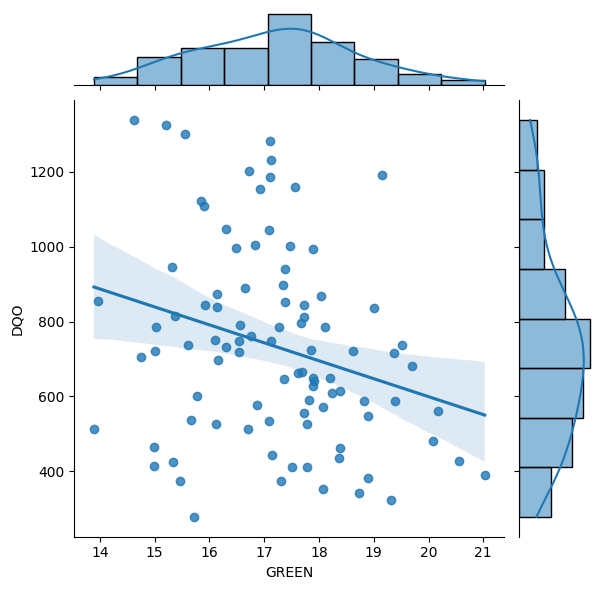

In [22]:
# Vamos a crear un joinplot de G vss DQO
sns.jointplot(x="GREEN", y="DQO", data=datosn, kind="reg")

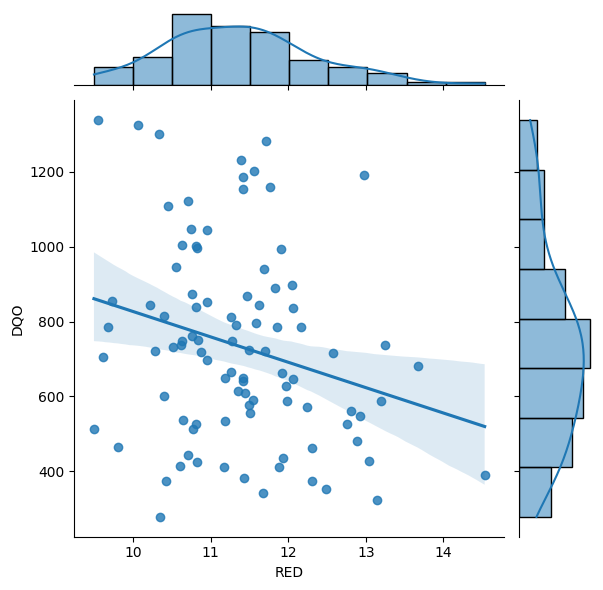

In [23]:
# Vamos a crear un joinplot de G vss DQO
sns.jointplot(x="RED", y="DQO", data=datosn, kind="reg")

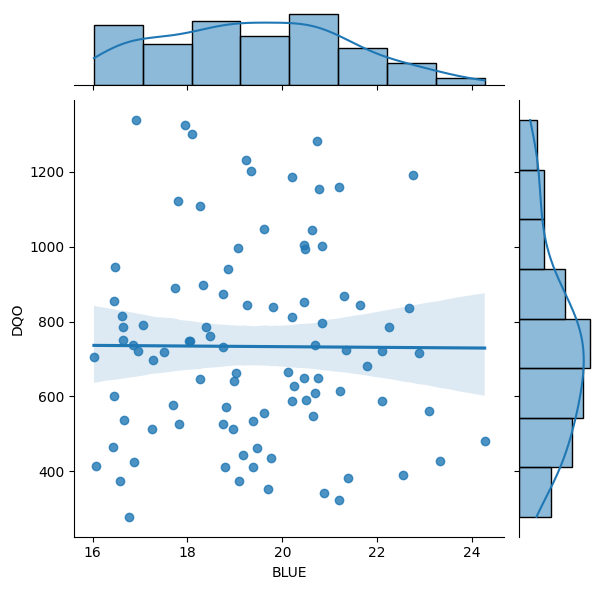

In [24]:
# Vamos a crear un joinplot de G vss DQO
sns.jointplot(x="BLUE", y="DQO", data=datosn, kind="reg")

## Modelo lineal

In [25]:
#Vamos a construir un modelo lineal
#Supuestos de Normalidad para que se cumpla el significado lineal
import statsmodels.formula.api as smf
formula="DQO ~ RED + GREEN + BLUE + Concentracion"
modelo=smf.ols(formula=formula, data=datosn)
modelo=modelo.fit()
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:                    DQO   R-squared:                       0.412
Model:                            OLS   Adj. R-squared:                  0.386
Method:                 Least Squares   F-statistic:                     15.59
Date:                Wed, 03 Dec 2025   Prob (F-statistic):           1.06e-09
Time:                        17:47:45   Log-Likelihood:                -630.42
No. Observations:                  94   AIC:                             1271.
Df Residuals:                      89   BIC:                             1284.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      1648.1515    260.622      6.324

In [26]:
datosn["DQO_prediccion_lineal"]=modelo.predict()
datosn.head()

,DQO,RED,GREEN,BLUE,Concentracion,DQO_categoria,Fuera de rango,Limite maximo permitido,Muy Alto,DQO_prediccion_lineal
0,731.666667,10.507042,16.309859,18.760563,1,Limite maximo permitido,0,1,0,821.247872
1,427.666667,13.041667,20.555556,23.319444,1,Muy Alto,0,0,1,587.032139
2,514.000000,10.767123,16.712329,18.958904,1,Limite maximo permitido,0,1,0,781.560130
3,836.000000,12.055556,19.000000,22.666667,1,Limite maximo permitido,0,1,0,755.777370
4,720.333333,10.283784,15.000000,16.959459,1,Limite maximo permitido,0,1,0,988.949996


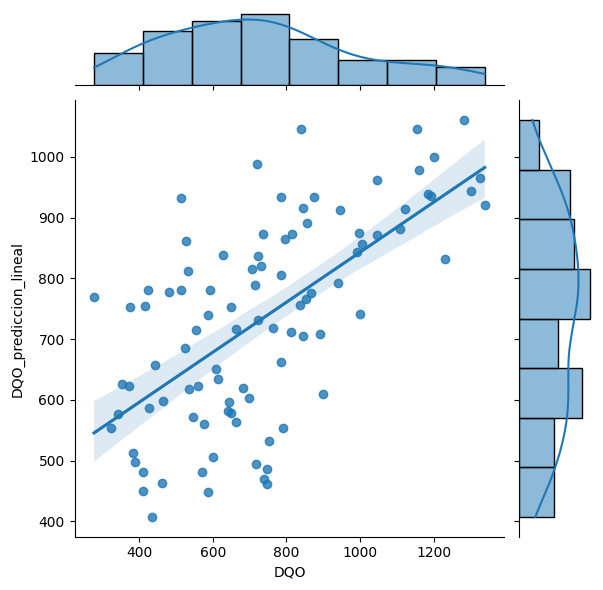

In [27]:
sns.jointplot(x="DQO", y="DQO_prediccion_lineal", data=datosn, kind="reg")

## Predictores

In [28]:
predictores=datosn.drop(["DQO", "DQO_categoria", "DQO_prediccion_lineal"], axis=1)
target=datosn["DQO"]

## Partición Hold out

In [29]:
#Método Hold out
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest=train_test_split(predictores, target, test_size=0.3, random_state=0)

#MODELO RL

In [30]:
#Modelo RL
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
rl=LinearRegression()
rl.fit(Xtrain, ytrain)

LinearRegression()

## Métricas de evalución de entrenamiento

In [31]:
rl_train_pred=rl.predict(Xtrain)# Realizamos las predicciones
R2_train=r2_score(ytrain, rl_train_pred)
RMSE_train=mean_squared_error(ytrain, rl_train_pred)**0.5
MAE_train=mean_absolute_error(ytrain, rl_train_pred)
print("El coeficiente de determinación para el entrenamiento es: ", R2_train)
print(" La Raiz del cuadratico medio para el entrenamiento es: ", RMSE_train)
print("Error absoluto cuadratico medio para el entrenamiento es: ", MAE_train)

El coeficiente de determinación para el entrenamiento es:  0.7537429505992901
 La Raiz del cuadratico medio para el entrenamiento es:  125.77759662650575
Error absoluto cuadratico medio para el entrenamiento es:  105.85941347685471


### Gráfica

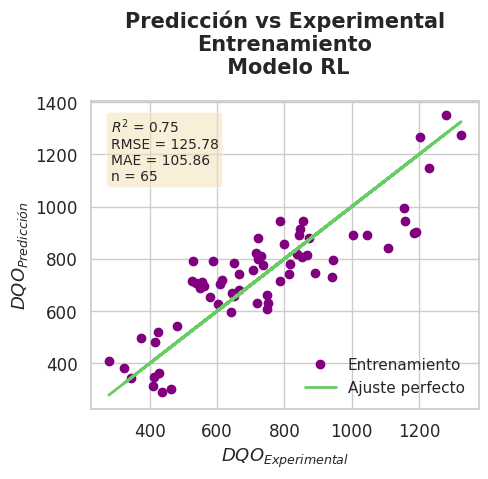

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(5, 4))
sns.set(style="whitegrid", palette="muted", font_scale=1.1)
plt.plot(ytrain, rl_train_pred, 'o', color='purple', label='Entrenamiento')
plt.plot(ytrain,ytrain,"g", label="Ajuste perfecto" , linewidth=2)
plt.xlabel("$DQO_{Experimental}$",fontsize=13)
plt.ylabel("$DQO_{Predicción}$",fontsize=13)
plt.title("Predicción vs Experimental\nEntrenamiento\n Modelo RL",fontsize=15, weight='bold', pad=20)
#Caja de texto
textstr = (
    f"$R^2$ = {R2_train:.2f}\n"
    f"RMSE = {RMSE_train:.2f}\n"
    f"MAE = {MAE_train:.2f}\n"
    f"n = {len(ytrain)}"
)
# Patch para la info
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)

# Caja de texto
plt.text(0.05, 0.95, textstr, transform=plt.gca().transAxes, fontsize=10,
        verticalalignment='top', bbox=props)


plt.grid(True)
plt.legend(frameon=False, fontsize=11)
plt.show()

## Métricas de evalución de prueba

In [33]:
rl_test_pred=rl.predict(Xtest)# Realizamos las predicciones
R2_test=r2_score(ytest, rl_test_pred)
RMSE_test=mean_squared_error(ytest, rl_test_pred)**0.5
MAE_test=mean_absolute_error(ytest, rl_test_pred)
print("El coeficiente de determinación para el entrenamiento es: ", R2_test)
print(" La Raiz del cuadratico medio para el entrenamiento es: ", RMSE_test)
print("Error absoluto cuadratico medio para el entrenamiento es: ", MAE_test)

El coeficiente de determinación para el entrenamiento es:  0.6082491898327647
 La Raiz del cuadratico medio para el entrenamiento es:  167.68072359218388
Error absoluto cuadratico medio para el entrenamiento es:  129.4181821803513


### Gráfica

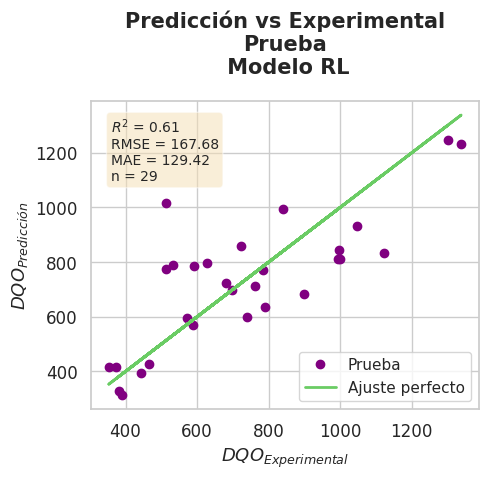

In [34]:
plt.figure(figsize=(5, 4))
sns.set(style="whitegrid", palette="muted", font_scale=1.1)
plt.plot(ytest, rl_test_pred, 'o', color='purple', label='Prueba')
plt.plot(ytest,ytest,"g", label="Ajuste perfecto" , linewidth=2)
plt.xlabel("$DQO_{Experimental}$",fontsize=13)
plt.ylabel("$DQO_{Predicción}$",fontsize=13)
plt.title("Predicción vs Experimental\nPrueba\n Modelo RL",fontsize=15, weight='bold', pad=20)
#Caja de texto
textstr = (
    f"$R^2$ = {R2_test:.2f}\n"
    f"RMSE = {RMSE_test:.2f}\n"
    f"MAE = {MAE_test:.2f}\n"
    f"n = {len(ytest)}"
)
#Info de patch
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)

#Caja de texto
plt.text(0.05, 0.95, textstr, transform=plt.gca().transAxes, fontsize=10,
        verticalalignment='top', bbox=props)


plt.grid(True)
plt.legend(fontsize=11)
plt.show()

## Particion de CV


In [35]:
#Aplicaremos CV para verificar si las metricas mejoran
from sklearn.model_selection import cross_val_score
rl_train_predcv=cross_val_score(rl, predictores, target, cv=7)

In [36]:
R2_train=cross_val_score(rl, predictores, target, cv=7, scoring="r2")
RMSE_train=cross_val_score(rl, predictores, target, cv=7, scoring="neg_root_mean_squared_error")
MAE_train=cross_val_score(rl, predictores, target, cv=7, scoring="neg_mean_absolute_error")
print("El coeficiente de determinación para el entrenamiento es: ", R2_train.mean())
print(" La Raiz del cuadratico medio para el entrenamiento es: ", -RMSE_train.mean()) # Take the absolute value of the negative RMSE
print("Error absoluto cuadratico medio para el entrenamiento es: ", -MAE_train.mean()) # Take the absolute value of the negative MAE (mean_absolute_error is also negative)

El coeficiente de determinación para el entrenamiento es:  0.38783524239720496
 La Raiz del cuadratico medio para el entrenamiento es:  157.03761734675913
Error absoluto cuadratico medio para el entrenamiento es:  127.07583296560531


### Gráfica

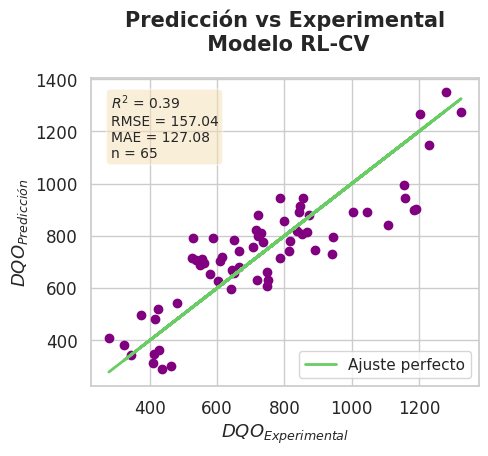

In [37]:
plt.figure(figsize=(5, 4))
sns.set(style="whitegrid", palette="muted", font_scale=1.1)
plt.plot(ytrain, rl_train_pred, 'o', color='purple')
plt.plot(ytrain,ytrain,"g", label="Ajuste perfecto" , linewidth=2)
plt.xlabel("$DQO_{Experimental}$",fontsize=13)
plt.ylabel("$DQO_{Predicción}$",fontsize=13)
plt.title("Predicción vs Experimental\n Modelo RL-CV",fontsize=15, weight='bold', pad=20)
#Caja de texto
textstr = (
    f"$R^2$ = {R2_train.mean():.2f}\n"
    f"RMSE = {-RMSE_train.mean():.2f}\n"
    f"MAE = {-MAE_train.mean():.2f}\n"
    f"n = {len(ytrain)}"
)
#App patch
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
#Lugar de la caja de texto
plt.text(0.05, 0.95, textstr, transform=plt.gca().transAxes, fontsize=10,
        verticalalignment='top', bbox=props)


plt.grid(True)
plt.legend(fontsize=11)
plt.show()

#MODELO KKN

In [38]:
from sklearn.neighbors import KNeighborsRegressor
knn=KNeighborsRegressor(n_neighbors=5,p=2)
knn.fit(Xtrain, ytrain)

KNeighborsRegressor()

In [39]:
predictores=datosn.drop(["DQO", "DQO_categoria", "DQO_prediccion_lineal"], axis=1)
target=datosn["DQO"]

In [40]:
#Particinamos nuestros valores70% y 30%
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest=train_test_split(predictores,
                                              target, train_size=0.70, test_size=0.3, random_state=0)


## Métricas de evalución de entrenamiento

In [41]:
#Obtenemos las métricas de evaluación para el conjunto de entrenamiento
knn.fit(Xtrain, ytrain) # Ensure the model is fitted
R2_train=knn.score(Xtrain, ytrain)
RMSE_train=mean_squared_error(ytrain, knn.predict(Xtrain))**0.5
MAE_train=mean_absolute_error(ytrain, knn.predict(Xtrain))
print("El coeficiente de determinación para la entrenamiento es: ", R2_train)
print(" La Raiz del cuadratico medio para la entrenamiento: ", RMSE_train)
print("Error absoluto cuadratico medio para la entrenamiento es: ", MAE_train)

El coeficiente de determinación para la entrenamiento es:  0.6814375174582119
 La Raiz del cuadratico medio para la entrenamiento:  143.05606330338904
Error absoluto cuadratico medio para la entrenamiento es:  107.41179487179488


### Gráfica


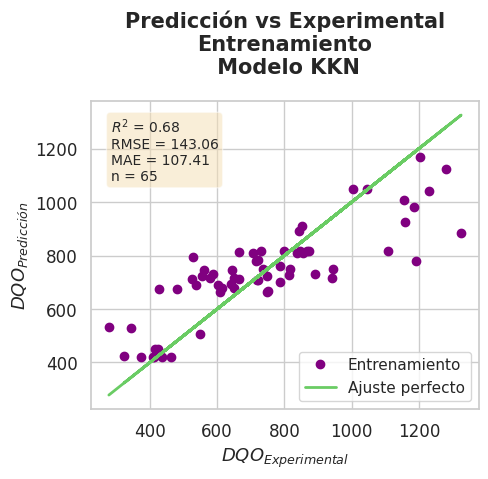

In [42]:
plt.figure(figsize=(5, 4))
sns.set(style="whitegrid", palette="muted", font_scale=1.1)
plt.plot(ytrain, knn.predict(Xtrain), 'o', color='purple', label='Entrenamiento')
plt.plot(ytrain,ytrain,"g", label="Ajuste perfecto" , linewidth=2)
plt.xlabel("$DQO_{Experimental}$",fontsize=13)
plt.ylabel("$DQO_{Predicción}$",fontsize=13)
plt.title("Predicción vs Experimental\nEntrenamiento\n Modelo KKN",fontsize=15, weight='bold', pad=20)
#Caja de patch
textstr = (
    f"$R^2$ = {R2_train:.2f}\n"
    f"RMSE = {RMSE_train:.2f}\n"
    f"MAE = {MAE_train:.2f}\n"
    f"n = {len(ytrain)}"
)
#Lugar de la caja de texto
plt.text(0.05, 0.95, textstr, transform=plt.gca().transAxes, fontsize=10,
        verticalalignment='top', bbox=props)


plt.grid(True)
plt.legend(fontsize=11)
plt.show()


## Métricas de evalución de prueba

In [43]:
##Obtenemos las métricas de evaluación para el conjunto de prueba
R2_test_pred=knn.score(Xtest, ytest)
RMSE_test=mean_squared_error(ytest, knn.predict(Xtest))**0.5
MAE_test=mean_absolute_error(ytest, knn.predict(Xtest))
print("El coeficiente de determinación para la prueba es: ", R2_test_pred)
print(" La Raiz del cuadratico medio para la prueba: ", RMSE_test)
print("Error absoluto cuadratico medio para la prueba es: ", MAE_test)

El coeficiente de determinación para la prueba es:  0.4015526826836433
 La Raiz del cuadratico medio para la prueba:  207.24838264092602
Error absoluto cuadratico medio para la prueba es:  165.24827586206894


### Gráfica

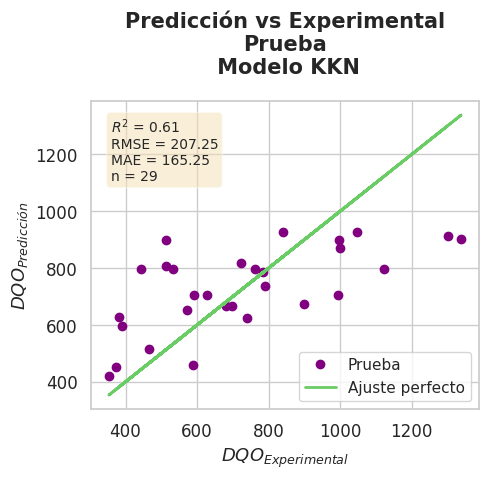

In [44]:
plt.figure(figsize=(5, 4))
sns.set(style="whitegrid", palette="muted", font_scale=1.1)
plt.plot(ytest, knn.predict(Xtest), 'o', color='purple', label='Prueba')
plt.plot(ytest,ytest,"g", label="Ajuste perfecto" , linewidth=2)
plt.xlabel("$DQO_{Experimental}$",fontsize=13)
plt.ylabel("$DQO_{Predicción}$",fontsize=13)
plt.title("Predicción vs Experimental\nPrueba\n Modelo KKN",fontsize=15, weight='bold', pad=20)
#Caja de la función Patch
textstr = (
    f"$R^2$ = {R2_test:.2f}\n"
    f"RMSE = {RMSE_test:.2f}\n"
    f"MAE = {MAE_test:.2f}\n"
    f"n = {len(ytest)}"
)
#Info del lugar de la caja
plt.text(0.05, 0.95, textstr, transform=plt.gca().transAxes, fontsize=10,
        verticalalignment='top', bbox=props)


plt.grid(True)
plt.legend(fontsize=11)
plt.show()


## Particion de CV

In [45]:
#Aplicaremos CV para verificar si las metricas mejoran
from sklearn.model_selection import cross_val_score
knn_train_predcv=cross_val_score(knn, predictores, target, cv=8)

In [46]:
R2_train=cross_val_score(knn, predictores, target, cv=8, scoring="r2")
RMSE_train=cross_val_score(knn, predictores, target, cv=8, scoring="neg_root_mean_squared_error")
MAE_train=cross_val_score(knn, predictores, target, cv=8, scoring="neg_mean_absolute_error")
print("El coeficiente de determinación para el entrenamiento es: ", -R2_train.mean())
print(" La Raiz del cuadratico medio para el entrenamiento es: ", -RMSE_train.mean())
print("Error absoluto cuadratico medio para el entrenamiento es: ", -MAE_train.mean())

El coeficiente de determinación para el entrenamiento es:  0.6771981246831154
 La Raiz del cuadratico medio para el entrenamiento es:  207.3840803294047
Error absoluto cuadratico medio para el entrenamiento es:  170.65422979797978


###Gráfica

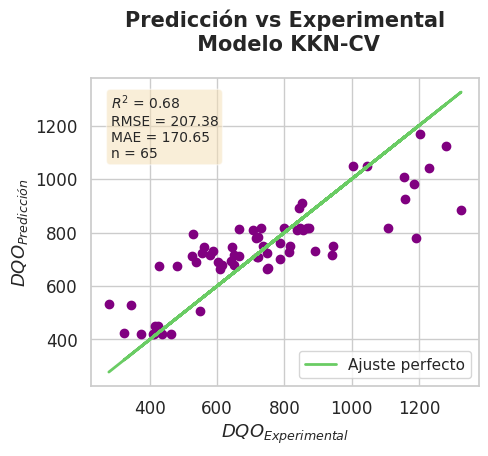

In [47]:
plt.figure(figsize=(5, 4))
sns.set(style="whitegrid", palette="muted", font_scale=1.1)
plt.plot(ytrain, knn.predict(Xtrain), 'o', color='purple')
plt.plot(ytrain,ytrain,"g", label="Ajuste perfecto" , linewidth=2)
plt.xlabel("$DQO_{Experimental}$",fontsize=13)
plt.ylabel("$DQO_{Predicción}$",fontsize=13)
plt.title("Predicción vs Experimental\n Modelo KKN-CV",fontsize=15, weight='bold', pad=20)
#Caja de texto
textstr = (
    f"$R^2$ = {-R2_train.mean():.2f}\n"
    f"RMSE = {-RMSE_train.mean():.2f}\n"
    f"MAE = {-MAE_train.mean():.2f}\n"
    f"n = {len(ytrain)}"
)
#lugar de la caja
plt.text(0.05, 0.95, textstr, transform=plt.gca().transAxes, fontsize=10,
        verticalalignment='top', bbox=props)


plt.grid(True)
plt.legend(fontsize=11)
plt.show()

#MODELO Random Forest

In [48]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor(n_estimators=1000, random_state=0)


In [49]:
predictores=datosn.drop(["DQO", "DQO_categoria", "DQO_prediccion_lineal"], axis=1)
target=datosn["DQO"]

In [50]:
#Particionamos nuestros valores 70% y 30%
Xtrain, Xtest, ytrain, ytest=train_test_split(predictores,
                                              target, train_size=0.7, test_size=0.3, random_state=0)

In [51]:
rf.fit(Xtrain,ytrain,sample_weight=None)

RandomForestRegressor(n_estimators=1000, random_state=0)

## Métricas de evalución de prueba

In [52]:
#Obtenemos las métricas de evalución para el conjunto de datos
R2_train=rf.score(Xtrain, ytrain)
RMSE_train=mean_squared_error(ytrain, rf.predict(Xtrain))**0.5
MAE_train=mean_absolute_error(ytrain, rf.predict(Xtrain))
R2_test_pred=rf.score(Xtest, ytest)
RMSE_test=mean_squared_error(ytest, rf.predict(Xtest))**0.5
MAE_test=mean_absolute_error(ytest, rf.predict(Xtest))
print("El coeficiente de determinación para la entrenamiento es: ", R2_train)
print(" La Raiz del cuadratico medio para la entrenamiento: ", RMSE_train)
print("Error absoluto cuadratico medio para la entrenamiento es: ", MAE_train)
print("El coeficiente de determinación para la prueba es: ", R2_test_pred)
print(" La Raiz del cuadratico medio para la prueba: ", RMSE_test)
print("Error absoluto cuadratico medio para la prueba es: ", MAE_test)

El coeficiente de determinación para la entrenamiento es:  0.9417584064695939
 La Raiz del cuadratico medio para la entrenamiento:  61.16818309911202
Error absoluto cuadratico medio para la entrenamiento es:  46.34237692307683
El coeficiente de determinación para la prueba es:  0.5747581694347002
 La Raiz del cuadratico medio para la prueba:  174.70131632449846
Error absoluto cuadratico medio para la prueba es:  127.89766091954043


### Gráfica

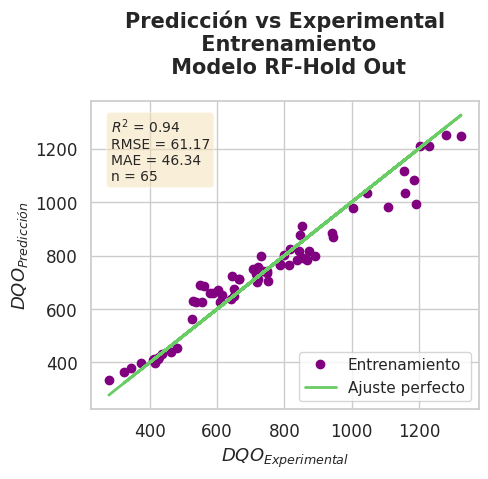

In [53]:
plt.figure(figsize=(5, 4))
sns.set(style="whitegrid", palette="muted", font_scale=1.1)
plt.plot(ytrain, rf.predict(Xtrain), 'o', color='purple', label='Entrenamiento')
plt.plot(ytrain,ytrain,"g", label="Ajuste perfecto" , linewidth=2)
plt.xlabel("$DQO_{Experimental}$",fontsize=13)
plt.ylabel("$DQO_{Predicción}$",fontsize=13)
plt.title("Predicción vs Experimental\n Entrenamiento\n Modelo RF-Hold Out",fontsize=15, weight='bold', pad=20)
#Caja de texto
textstr = (
    f"$R^2$ = {R2_train:.2f}\n"
    f"RMSE = {RMSE_train:.2f}\n"
    f"MAE = {MAE_train:.2f}\n"
    f"n = {len(ytrain)}"
)
#Info del patch
plt.text(0.05, 0.95, textstr, transform=plt.gca().transAxes, fontsize=10,
        verticalalignment='top', bbox=props)


plt.grid(True)
plt.legend(fontsize=11)
plt.show()

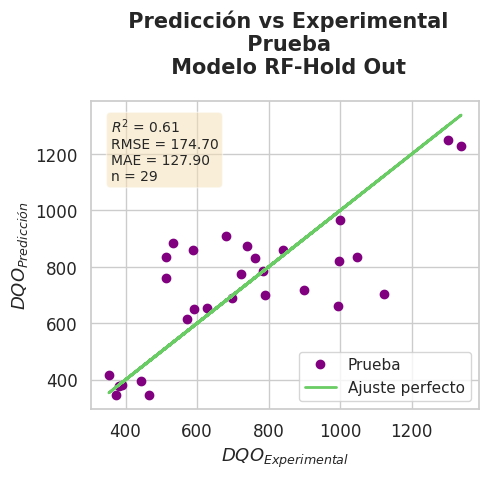

In [54]:
plt.figure(figsize=(5, 4))
sns.set(style="whitegrid", palette="muted", font_scale=1.1)
plt.plot(ytest, rf.predict(Xtest), 'o', color='purple', label='Prueba')
plt.plot(ytest,ytest,"g", label="Ajuste perfecto" , linewidth=2)
plt.xlabel("$DQO_{Experimental}$",fontsize=13)
plt.ylabel("$DQO_{Predicción}$",fontsize=13)
plt.title(" Predicción vs Experimental\n Prueba\n Modelo RF-Hold Out",fontsize=15, weight='bold', pad=20)
#Caja de texto
textstr = (
    f"$R^2$ = {R2_test:.2f}\n"
    f"RMSE = {RMSE_test:.2f}\n"
    f"MAE = {MAE_test:.2f}\n"
    f"n = {len(ytest)}"
)
#Info del patch
plt.text(0.05, 0.95, textstr, transform=plt.gca().transAxes, fontsize=10,
        verticalalignment='top', bbox=props)


plt.grid(True)
plt.legend(fontsize=11)
plt.show()

## Particion de CV

In [55]:
#Aplicaremos CV para verificar si las metricas mejoran
from sklearn.model_selection import cross_val_score
knn_train_predcv=cross_val_score(rf, predictores, target, cv=7)

In [56]:
R2_train=cross_val_score(rf, predictores, target, cv=7, scoring="r2")
RMSE_train=cross_val_score(rf, predictores, target, cv=7, scoring="neg_root_mean_squared_error")
MAE_train=cross_val_score(rf, predictores, target, cv=7, scoring="neg_mean_absolute_error")
print("El coeficiente de determinación para el entrenamiento es: ", R2_train.mean())
print(" La Raiz del cuadratico medio para el entrenamiento es: ", -RMSE_train.mean())
print("Error absoluto cuadratico medio para el entrenamiento es: ", -MAE_train.mean())

El coeficiente de determinación para el entrenamiento es:  0.30527298962431315
 La Raiz del cuadratico medio para el entrenamiento es:  171.66291818550613
Error absoluto cuadratico medio para el entrenamiento es:  133.19224712192607


### Gráfica

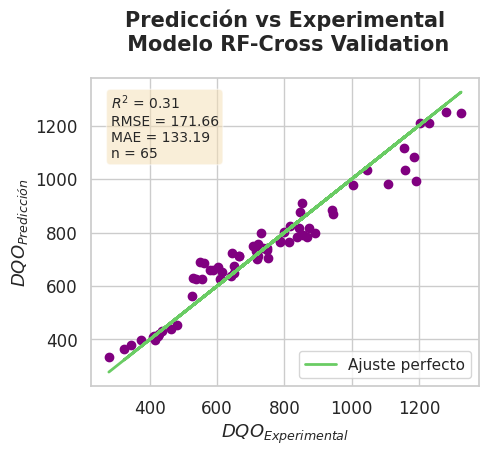

In [57]:
plt.figure(figsize=(5, 4))
sns.set(style="whitegrid", palette="muted", font_scale=1.1)
plt.plot(ytrain, rf.predict(Xtrain), 'o', color='purple')
plt.plot(ytrain,ytrain,"g", label="Ajuste perfecto" , linewidth=2)
plt.xlabel("$DQO_{Experimental}$",fontsize=13)
plt.ylabel("$DQO_{Predicción}$",fontsize=13)
plt.title("Predicción vs Experimental\n Modelo RF-Cross Validation",fontsize=15, weight='bold', pad=20)
#Caja de texto
textstr = (
    f"$R^2$ = {R2_train.mean():.2f}\n"
    f"RMSE = {-RMSE_train.mean():.2f}\n"
    f"MAE = {-MAE_train.mean():.2f}\n"
    f"n = {len(ytrain)}"
)
#Lugar de la caja
plt.text(0.05, 0.95, textstr, transform=plt.gca().transAxes, fontsize=10,
        verticalalignment='top', bbox=props)


plt.grid(True)
plt.legend(fontsize=11)
plt.show()

# VARIABLES SINTETICAS

In [58]:
datos_nuevos = pd.DataFrame()
datos_nuevos["S1"]=datos["RED"]*datos["GREEN"]
datos_nuevos["S2"]=datos["RED"]*datos["BLUE"]
datos_nuevos["S3"]=datos["GREEN"]*datos["BLUE"]
datos_nuevos["S4"]=datos["RED"]*datos["GREEN"]**2
datos_nuevos["S5"]=datos["RED"]*datos["BLUE"]**2
datos_nuevos["S6"]=datos["GREEN"]*datos["BLUE"]**2
datos_nuevos.head()

,S1,S2,S3,S4,S5,S6
0,171.368379,197.118032,305.982146,2794.994130,3698.045335,5740.397451
1,268.078704,304.124421,479.344136,5510.506687,7092.012547,11178.038945
2,179.943704,204.132858,316.847439,3007.278345,3870.135279,6007.080205
3,229.055556,273.259259,430.666667,4352.055556,6193.876543,9761.777778
4,154.256757,174.407414,254.391892,2313.851351,2957.855470,4314.348977


In [59]:
target.head()

,DQO
0,731.666667
1,427.666667
2,514.000000
3,836.000000
4,720.333333


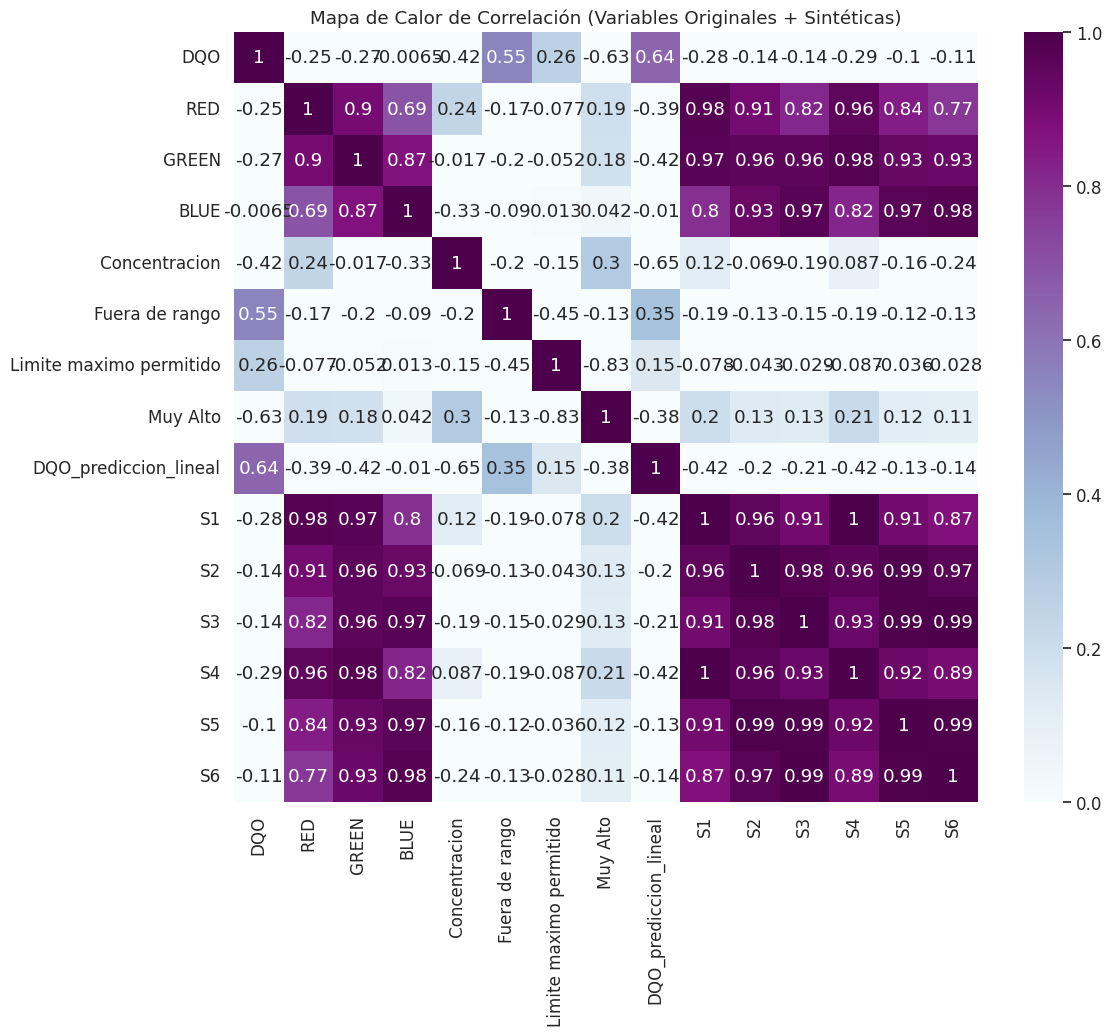

In [60]:
# Combinar los DataFrames datosn (sin la columna original DQO_categoria) y datos_nuevos
datos_combinados = pd.concat([datosn.drop(columns=["DQO_categoria"]), datos_nuevos], axis=1)

# Calcular la matriz de correlación del DataFrame combinado
correlation_matrix_combinada = datos_combinados.corr(method="pearson")

# Crear el mapa de calor
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 10)) # Ajusta el tamaño si es necesario
sns.heatmap(correlation_matrix_combinada, vmin=0, vmax=1, annot=True, cmap="BuPu")
plt.title('Mapa de Calor de Correlación (Variables Originales + Sintéticas)')
plt.show()

In [61]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [62]:
target.head()

,DQO
0,731.666667
1,427.666667
2,514.000000
3,836.000000
4,720.333333


# Procesamiento de los datos

# *Mapa de calor*

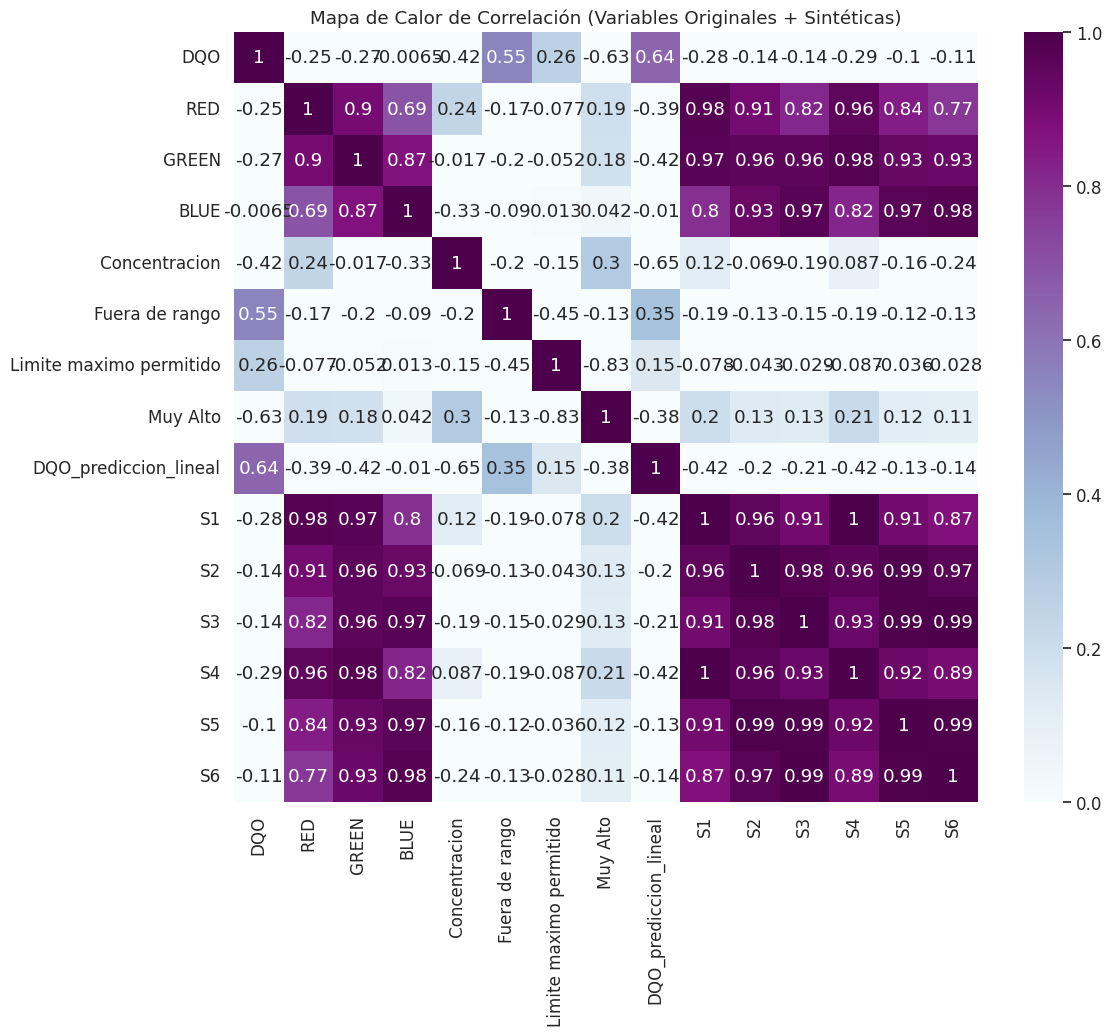

In [63]:
# Combinar los DataFrames datosn (sin la columna original DQO_categoria) y datos_nuevos
datos_combinados = pd.concat([datosn.drop(columns=["DQO_categoria"]), datos_nuevos], axis=1)

# Calcular la matriz de correlación del DataFrame combinado
correlation_matrix_combinada = datos_combinados.corr(method="pearson")

# Crear el mapa de calor
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 10)) # Ajusta el tamaño si es necesario
sns.heatmap(correlation_matrix_combinada, vmin=0, vmax=1, annot=True, cmap="BuPu")
plt.title('Mapa de Calor de Correlación (Variables Originales + Sintéticas)')
plt.show()

# Def Predictores

In [64]:
#Definimos nuevas variables de predicción y objetivo utilizando el DataFrame combinado
# Aseguramos que las columnas a eliminar existan en el DataFrame
columns_to_drop = ["DQO"]
# Solo intentamos eliminar las columnas que existen
existing_columns_to_drop = [col for col in columns_to_drop if col in datos_combinados.columns]
predictores_n = datos_combinados.drop(columns=existing_columns_to_drop)
target_n = datos_combinados["DQO"]

In [65]:
predictores_n.head()

,RED,GREEN,BLUE,Concentracion,Fuera de rango,Limite maximo permitido,Muy Alto,DQO_prediccion_lineal,S1,S2,S3,S4,S5,S6
0,10.507042,16.309859,18.760563,1,0,1,0,821.247872,171.368379,197.118032,305.982146,2794.994130,3698.045335,5740.397451
1,13.041667,20.555556,23.319444,1,0,0,1,587.032139,268.078704,304.124421,479.344136,5510.506687,7092.012547,11178.038945
2,10.767123,16.712329,18.958904,1,0,1,0,781.560130,179.943704,204.132858,316.847439,3007.278345,3870.135279,6007.080205
3,12.055556,19.000000,22.666667,1,0,1,0,755.777370,229.055556,273.259259,430.666667,4352.055556,6193.876543,9761.777778
4,10.283784,15.000000,16.959459,1,0,1,0,988.949996,154.256757,174.407414,254.391892,2313.851351,2957.855470,4314.348977


In [66]:
target_n.head()

,DQO
0,731.666667
1,427.666667
2,514.000000
3,836.000000
4,720.333333


## Partición Hold out

In [67]:
#Método Hold out
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest=train_test_split(predictores_n, target_n, test_size=0.3, random_state=0)

#MODELO RL

In [68]:
#Modelo RL
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
rl=LinearRegression()
rl.fit(Xtrain, ytrain)

LinearRegression()

## Métricas de evalución de entrenamiento

In [69]:
rl_train_pred=rl.predict(Xtrain)# Realizamos las predicciones
R2_train=r2_score(ytrain, rl_train_pred)
RMSE_train=mean_squared_error(ytrain, rl_train_pred)**0.5
MAE_train=mean_absolute_error(ytrain, rl_train_pred)
print("El coeficiente de determinación para el entrenamiento es: ", R2_train)
print(" La Raiz del cuadratico medio para el entrenamiento es: ", RMSE_train)
print("Error absoluto cuadratico medio para el entrenamiento es: ", MAE_train)

El coeficiente de determinación para el entrenamiento es:  0.8041448526717635
 La Raiz del cuadratico medio para el entrenamiento es:  112.16993057513753
Error absoluto cuadratico medio para el entrenamiento es:  93.81251803182755


### Gráfica

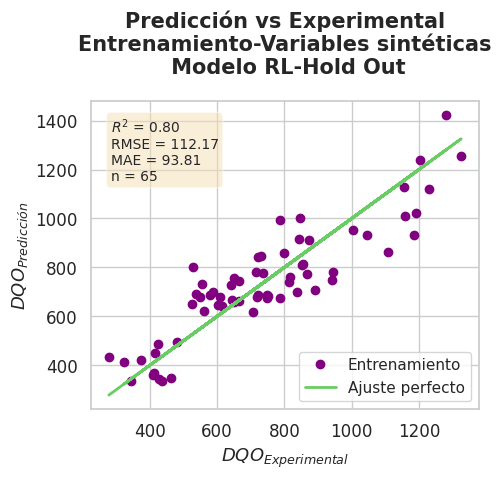

In [70]:
plt.figure(figsize=(5, 4))
sns.set(style="whitegrid", palette="muted", font_scale=1.1)
plt.plot(ytrain, rl_train_pred, 'o', color='purple', label='Entrenamiento')
plt.plot(ytrain,ytrain,"g", label="Ajuste perfecto" , linewidth=2)
plt.xlabel("$DQO_{Experimental}$",fontsize=13)
plt.ylabel("$DQO_{Predicción}$",fontsize=13)
plt.title("Predicción vs Experimental\nEntrenamiento-Variables sintéticas\n Modelo RL-Hold Out",fontsize=15, weight='bold', pad=20)
#Caja de texto
textstr = (
    f"$R^2$ = {R2_train:.2f}\n"
    f"RMSE = {RMSE_train:.2f}\n"
    f"MAE = {MAE_train:.2f}\n"
    f"n = {len(ytrain)}"
)

# these are matplotlib.patch.Patch properties
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)

# place a text box in upper left in axes coords
plt.text(0.05, 0.95, textstr, transform=plt.gca().transAxes, fontsize=10,
        verticalalignment='top', bbox=props)


plt.grid(True)
plt.legend(fontsize=11)
plt.show()

## Métricas de evalución de prueba

In [71]:
rl_test_pred=rl.predict(Xtest)# Realizamos las predicciones
R2_test=r2_score(ytest, rl_test_pred)
RMSE_test=mean_squared_error(ytest, rl_test_pred)**0.5
MAE_test=mean_absolute_error(ytest, rl_test_pred)
print("El coeficiente de determinación para el entrenamiento es: ", R2_test)
print(" La Raiz del cuadratico medio para el entrenamiento es: ", RMSE_test)
print("Error absoluto cuadratico medio para el entrenamiento es: ", MAE_test)

El coeficiente de determinación para el entrenamiento es:  0.45903496988600845
 La Raiz del cuadratico medio para el entrenamiento es:  197.0438042249173
Error absoluto cuadratico medio para el entrenamiento es:  155.74252807847816


### Gráficas


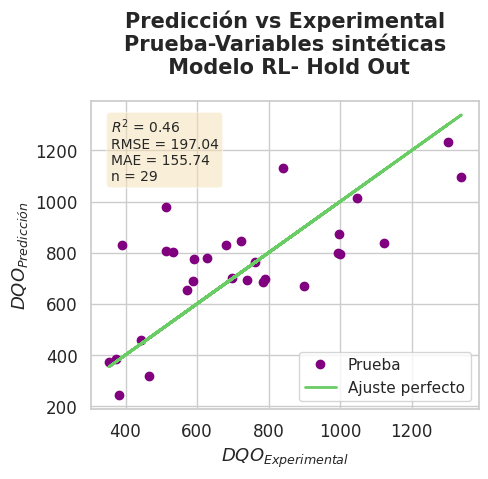

In [72]:
plt.figure(figsize=(5, 4))
sns.set(style="whitegrid", palette="muted", font_scale=1.1)
plt.plot(ytest, rl_test_pred, 'o', color='purple', label='Prueba')
plt.plot(ytest,ytest,"g", label="Ajuste perfecto" , linewidth=2)
plt.xlabel("$DQO_{Experimental}$",fontsize=13)
plt.ylabel("$DQO_{Predicción}$",fontsize=13)
plt.title("Predicción vs Experimental\nPrueba-Variables sintéticas\n Modelo RL- Hold Out",fontsize=15, weight='bold', pad=20)
#Caja de texto
textstr = (
    f"$R^2$ = {R2_test:.2f}\n"
    f"RMSE = {RMSE_test:.2f}\n"
    f"MAE = {MAE_test:.2f}\n"
    f"n = {len(ytest)}"
)
#Info del patch
plt.text(0.05, 0.95, textstr, transform=plt.gca().transAxes, fontsize=10,
        verticalalignment='top', bbox=props)


plt.grid(True)
plt.legend(fontsize=11)
plt.show()

## Particion de CV


In [73]:
#Aplicaremos CV para verificar si las metricas mejoran
from sklearn.model_selection import cross_val_score
rl_train_predcv=cross_val_score(rl, predictores_n, target_n, cv=10)

In [74]:
R2_train=cross_val_score(rl, predictores_n, target_n, cv=10, scoring="r2")
RMSE_train=cross_val_score(rl, predictores_n, target_n, cv=10, scoring="neg_root_mean_squared_error")
MAE_train=cross_val_score(rl, predictores_n, target_n, cv=10, scoring="neg_mean_absolute_error")
print("El coeficiente de determinación para el entrenamiento es: ", -R2_train.mean())
print(" La Raiz del cuadratico medio para el entrenamiento es: ", -RMSE_train.mean()) # Take the absolute value of the negative RMSE
print("Error absoluto cuadratico medio para el entrenamiento es: ", -MAE_train.mean()) # Take the absolute value of the negative MAE (mean_absolute_error is also negative)

El coeficiente de determinación para el entrenamiento es:  0.6101172780134667
 La Raiz del cuadratico medio para el entrenamiento es:  162.64552220349447
Error absoluto cuadratico medio para el entrenamiento es:  134.08253357651253


### Gráfica

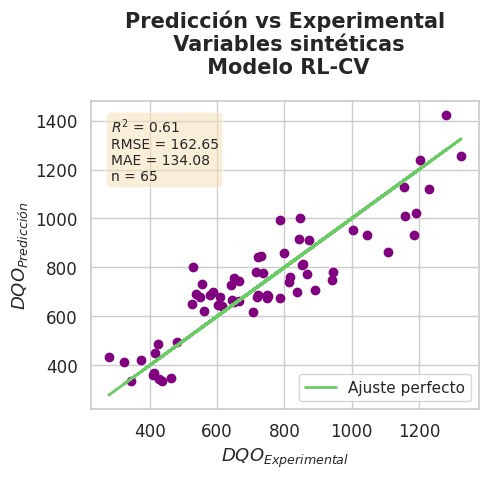

In [75]:
plt.figure(figsize=(5, 4))
sns.set(style="whitegrid", palette="muted", font_scale=1.1)
plt.plot(ytrain, rl_train_pred, 'o', color='purple')
plt.plot(ytrain,ytrain,"g", label="Ajuste perfecto" , linewidth=2)
plt.xlabel("$DQO_{Experimental}$",fontsize=13)
plt.ylabel("$DQO_{Predicción}$",fontsize=13)
plt.title("Predicción vs Experimental\n Variables sintéticas\n Modelo RL-CV",fontsize=15, weight='bold', pad=20)
#Caja de texto
textstr = (
    f"$R^2$ = {-R2_train.mean():.2f}\n"
    f"RMSE = {-RMSE_train.mean():.2f}\n"
    f"MAE = {-MAE_train.mean():.2f}\n"
    f"n = {len(ytrain)}"
)
#Ubicación de la caja
plt.text(0.05, 0.95, textstr, transform=plt.gca().transAxes, fontsize=10,
        verticalalignment='top', bbox=props)


plt.grid(True)
plt.legend(fontsize=11)
plt.show()

#MODELO KKN

In [76]:
from sklearn.neighbors import KNeighborsRegressor
knn=KNeighborsRegressor(n_neighbors=12,p=2)
knn.fit(Xtrain, ytrain)

KNeighborsRegressor(n_neighbors=12)

In [77]:
#Particinamos nuestros valores70% y 30%
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest=train_test_split(predictores_n,
                                              target_n, train_size=0.7, test_size=0.3, random_state=0)


## Métricas de evalución de entrenamiento

In [78]:
#Obtenemos las métricas de evaluación para el conjunto de entrenamiento
knn.fit(Xtrain, ytrain) # Ensure the model is fitted
R2_train=knn.score(Xtrain, ytrain)
RMSE_train=mean_squared_error(ytrain, knn.predict(Xtrain))**0.5
MAE_train=mean_absolute_error(ytrain, knn.predict(Xtrain))
print("El coeficiente de determinación para la entrenamiento es: ", R2_train)
print(" La Raiz del cuadratico medio para la entrenamiento: ", RMSE_train)
print("Error absoluto cuadratico medio para la entrenamiento es: ", MAE_train)

El coeficiente de determinación para la entrenamiento es:  0.2135994368944778
 La Raiz del cuadratico medio para la entrenamiento:  224.76612795182004
Error absoluto cuadratico medio para la entrenamiento es:  179.5871794871795


### Gráfica

## Métricas de evalución de prueba

In [79]:
##Obtenemos las métricas de evaluación para el conjunto de prueba
R2_test_pred=knn.score(Xtest, ytest)
RMSE_test=mean_squared_error(ytest, knn.predict(Xtest))**0.5
MAE_test=mean_absolute_error(ytest, knn.predict(Xtest))
print("El coeficiente de determinación para la prueba es: ", R2_test_pred)
print(" La Raiz del cuadratico medio para la prueba: ", RMSE_test)
print("Error absoluto cuadratico medio para la prueba es: ", MAE_test)

El coeficiente de determinación para la prueba es:  0.1583950471801736
 La Raiz del cuadratico medio para la prueba:  245.77195782046542
Error absoluto cuadratico medio para la prueba es:  194.45067049808426


Predijo mejor con este método

## Particion de CV

In [80]:
#Aplicaremos CV para verificar si las metricas mejoran
from sklearn.model_selection import cross_val_score
knn_train_predcv=cross_val_score(knn, predictores_n, target_n, cv=12)

In [81]:
R2_train=cross_val_score(knn, predictores_n, target_n, cv=12, scoring="r2")
RMSE_train=cross_val_score(knn, predictores_n, target_n, cv=12, scoring="neg_root_mean_squared_error")
MAE_train=cross_val_score(knn, predictores_n, target_n, cv=12, scoring="neg_mean_absolute_error")
print("El coeficiente de determinación para el entrenamiento es: ", -R2_train.mean())
print(" La Raiz del cuadratico medio para el entrenamiento es: ", -RMSE_train.mean())
print("Error absoluto cuadratico medio para el entrenamiento es: ", -MAE_train.mean())

El coeficiente de determinación para el entrenamiento es:  0.9535225414169882
 La Raiz del cuadratico medio para el entrenamiento es:  227.66043715054914
Error absoluto cuadratico medio para el entrenamiento es:  193.4519675925926


### Gráfica

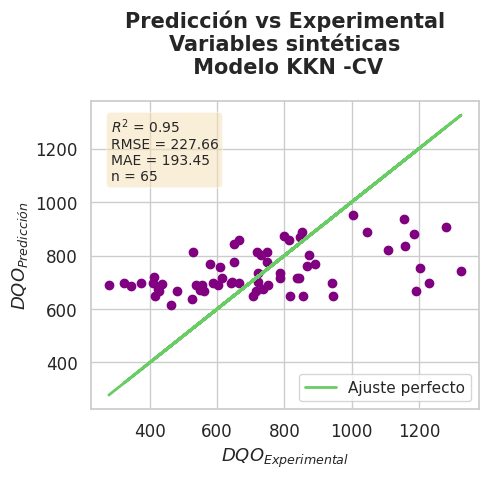

In [82]:
plt.figure(figsize=(5, 4))
sns.set(style="whitegrid", palette="muted", font_scale=1.1)
plt.plot(ytrain, knn.predict(Xtrain), 'o', color='purple')
plt.plot(ytrain,ytrain,"g", label="Ajuste perfecto" , linewidth=2)
plt.xlabel("$DQO_{Experimental}$",fontsize=13)
plt.ylabel("$DQO_{Predicción}$",fontsize=13)
plt.title("Predicción vs Experimental\nVariables sintéticas\n Modelo KKN -CV",fontsize=15, weight='bold', pad=20)
#Caja de texto
textstr = (
    f"$R^2$ = {-R2_train.mean():.2f}\n"
    f"RMSE = {-RMSE_train.mean():.2f}\n"
    f"MAE = {-MAE_train.mean():.2f}\n"
    f"n = {len(ytrain)}"
)
#Info del patch
plt.text(0.05, 0.95, textstr, transform=plt.gca().transAxes, fontsize=10,
        verticalalignment='top', bbox=props)


plt.grid(True)
plt.legend(fontsize=11)
plt.show()

#MODELO Random Forest

In [83]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor(n_estimators=1000, random_state=0)


In [84]:
#Particionamos nuestros valores 70% y 30%
Xtrain, Xtest, ytrain, ytest=train_test_split(predictores_n,
                                              target_n, train_size=0.7, test_size=0.3, random_state=0)

In [85]:
rf.fit(Xtrain,ytrain,sample_weight=None)

RandomForestRegressor(n_estimators=1000, random_state=0)

## Métricas de evalución de prueba

In [86]:
#Obtenemos las métricas de evalución para el conjunto de datos
R2_train=rf.score(Xtrain, ytrain)
RMSE_train=mean_squared_error(ytrain, rf.predict(Xtrain))**0.5
MAE_train=mean_absolute_error(ytrain, rf.predict(Xtrain))

print("El coeficiente de determinación para la entrenamiento es: ", R2_train)
print(" La Raiz del cuadratico medio para la entrenamiento: ", RMSE_train)
print("Error absoluto cuadratico medio para la entrenamiento es: ", MAE_train)


El coeficiente de determinación para la entrenamiento es:  0.9470903076749616
 La Raiz del cuadratico medio para la entrenamiento:  58.30107654356751
Error absoluto cuadratico medio para la entrenamiento es:  43.03705384615402


### Gráfica

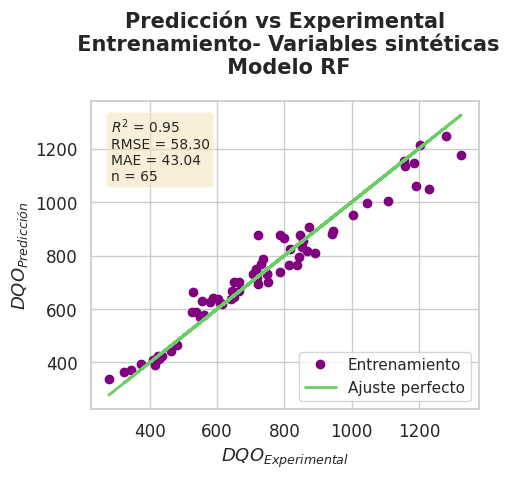

In [87]:
plt.figure(figsize=(5, 4))
sns.set(style="whitegrid", palette="muted", font_scale=1.1)
plt.plot(ytrain, rf.predict(Xtrain), 'o', color='purple', label='Entrenamiento')
plt.plot(ytrain,ytrain,"g", label="Ajuste perfecto" , linewidth=2)
plt.xlabel("$DQO_{Experimental}$",fontsize=13)
plt.ylabel("$DQO_{Predicción}$",fontsize=13)
plt.title("Predicción vs Experimental\n Entrenamiento- Variables sintéticas\n Modelo RF",fontsize=15, weight='bold', pad=20)
#Caja de textop
textstr = (
    f"$R^2$ = {R2_train:.2f}\n"
    f"RMSE = {RMSE_train:.2f}\n"
    f"MAE = {MAE_train:.2f}\n"
    f"n = {len(ytrain)}"
)
#Info del patch
plt.text(0.05, 0.95, textstr, transform=plt.gca().transAxes, fontsize=10,
        verticalalignment='top', bbox=props)


plt.grid(True)
plt.legend(fontsize=11)
plt.show()

In [88]:
R2_test_pred=rf.score(Xtest, ytest)
RMSE_test=mean_squared_error(ytest, rf.predict(Xtest))**0.5
MAE_test=mean_absolute_error(ytest, rf.predict(Xtest))
print("El coeficiente de determinación para la prueba es: ", R2_test_pred)
print(" La Raiz del cuadratico medio para la prueba: ", RMSE_test)
print("Error absoluto cuadratico medio para la prueba es: ", MAE_test)

El coeficiente de determinación para la prueba es:  0.5424092333440409
 La Raiz del cuadratico medio para la prueba:  181.22445988673425
Error absoluto cuadratico medio para la prueba es:  145.75089080459776


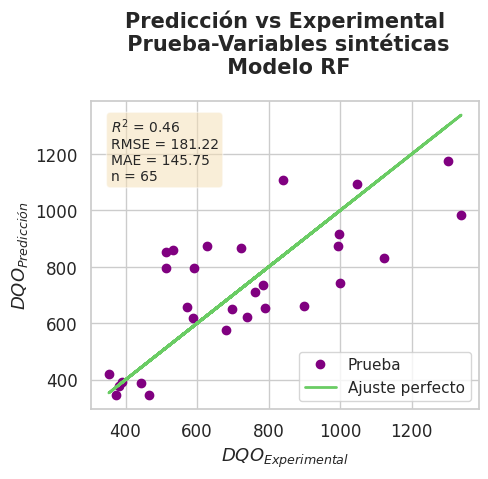

In [89]:
plt.figure(figsize=(5, 4))
sns.set(style="whitegrid", palette="muted", font_scale=1.1)
plt.plot(ytest, rf.predict(Xtest), 'o', color='purple', label='Prueba')
plt.plot(ytest,ytest,"g", label="Ajuste perfecto" , linewidth=2)
plt.xlabel("$DQO_{Experimental}$",fontsize=13)
plt.ylabel("$DQO_{Predicción}$",fontsize=13)
plt.title("Predicción vs Experimental\n Prueba-Variables sintéticas\n Modelo RF",fontsize=15, weight='bold', pad=20)
#Caja de texto
textstr = (
    f"$R^2$ = {R2_test:.2f}\n"
    f"RMSE = {RMSE_test:.2f}\n"
    f"MAE = {MAE_test:.2f}\n"
    f"n = {len(ytrain)}"
)
#info de patch
plt.text(0.05, 0.95, textstr, transform=plt.gca().transAxes, fontsize=10,
        verticalalignment='top', bbox=props)


plt.grid(True)
plt.legend(fontsize=11)
plt.show()

## Particion de CV

In [90]:
#Aplicaremos CV para verificar si las metricas mejoran
from sklearn.model_selection import cross_val_score
knn_train_predcv=cross_val_score(rf, predictores_n, target_n, cv=14)

In [91]:
R2_train=cross_val_score(rf, predictores_n, target_n, cv=14, scoring="r2")
RMSE_train=cross_val_score(rf, predictores_n, target_n, cv=14, scoring="neg_root_mean_squared_error")
MAE_train=cross_val_score(rf, predictores_n, target_n, cv=14, scoring="neg_mean_absolute_error")
print("El coeficiente de determinación para el entrenamiento es: ", -R2_train.mean())
print(" La Raiz del cuadratico medio para el entrenamiento es: ", -RMSE_train.mean())
print("Error absoluto cuadratico medio para el entrenamiento es: ", -MAE_train.mean())

El coeficiente de determinación para el entrenamiento es:  0.47740125810205036
 La Raiz del cuadratico medio para el entrenamiento es:  161.67676555990235
Error absoluto cuadratico medio para el entrenamiento es:  134.092801303855


### Gráficas

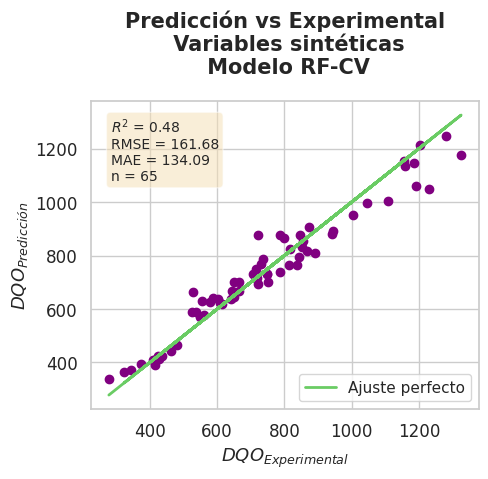

In [92]:
plt.figure(figsize=(5, 4))
sns.set(style="whitegrid", palette="muted", font_scale=1.1)
plt.plot(ytrain, rf.predict(Xtrain), 'o', color='purple')
plt.plot(ytrain,ytrain,"g", label="Ajuste perfecto" , linewidth=2)
plt.xlabel("$DQO_{Experimental}$",fontsize=13)
plt.ylabel("$DQO_{Predicción}$",fontsize=13)
plt.title("Predicción vs Experimental\n Variables sintéticas\n Modelo RF-CV",fontsize=15, weight='bold', pad=20)
#Caja de texto
textstr = (
    f"$R^2$ = {-R2_train.mean():.2f}\n"
    f"RMSE = {-RMSE_train.mean():.2f}\n"
    f"MAE = {-MAE_train.mean():.2f}\n"
    f"n = {len(ytrain)}"
)
#Info del patch
plt.text(0.05, 0.95, textstr, transform=plt.gca().transAxes, fontsize=10,
        verticalalignment='top', bbox=props)


plt.grid(True)
plt.legend(fontsize=11)
plt.show()

In [ ]:
#Vamos asubir el codigo a GIthop
# TESIS DE ESTEFANY VELAZCO
#"Predicción de DQO en aguas residuales mediante el uso de herramientas de Inteligencia Artificial."
En este repositorio vamos a encontrar el codigo del avance de mi tesis
README.md